# Vision Applications Suite
## 🎯 Objective

To implement and demonstrate computer vision applications such as face detection, face recognition, surveillance tracking, and in-vehicle vision systems using Python and OpenCV.

## 🧩 Topics & Implementation Summary
| Application Area             | Concepts Implemented                                                   |
| :--------------------------- | :--------------------------------------------------------------------- |
| **Photo Album**              | Face Detection, Recognition, Eigenfaces                                |
| **Surveillance**             | Foreground-Background Separation, Chamfer Matching, Occlusion Handling |
| **In-Vehicle Vision System** | Roadway Detection, Lane Marking Extraction, Road Sign Identification   |


## 🔧 Requirements
``` bash
pip install opencv-python numpy matplotlib scipy
```

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

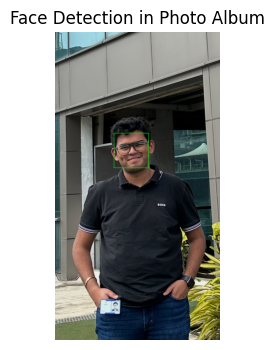

In [9]:
# 1️⃣ FACE DETECTION
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
image = cv2.imread("dataset/SatvikCasualPic.jpeg")  # use any static group photo
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Face Detection in Photo Album")
plt.axis('off')

In [10]:
# 2️⃣ FACE RECOGNITION USING EIGENFACES
# Load multiple aligned face images of 2–3 people into 'faceset/'
# Each face should be same size (e.g., 100x100 gray)
def load_faces(folder):
    import os
    imgs = []
    for f in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, f), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            imgs.append(img.flatten())
    return np.array(imgs)

try:
    faceset = load_faces("faceset")
    scaler = StandardScaler().fit(faceset)
    faces_scaled = scaler.transform(faceset)
    pca = PCA(n_components=10).fit(faces_scaled)
    eigenfaces = pca.components_.reshape((10,100,100))

    plt.subplot(1,3,2)
    plt.imshow(eigenfaces[0], cmap='gray')
    plt.title("Eigenface Representation")
    plt.axis('off')
except Exception as e:
    print("Eigenface demo skipped (add face images in 'faceset/' folder).")


Eigenface demo skipped (add face images in 'faceset/' folder).


In [14]:
# 3️⃣ SURVEILLANCE — FOREGROUND-BACKGROUND SEPARATION
bg = cv2.imread("dataset/empty_scene.png", cv2.IMREAD_GRAYSCALE)
fg = cv2.imread("dataset/scene_with_person.png", cv2.IMREAD_GRAYSCALE)
if bg is not None and fg is not None and bg.shape == fg.shape:
    diff = cv2.absdiff(bg, fg)
    _, mask = cv2.threshold(diff, 40, 255, cv2.THRESH_BINARY)
    plt.subplot(1,3,3)
    plt.imshow(mask, cmap='gray')
    plt.title("Foreground-Background Separation")
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

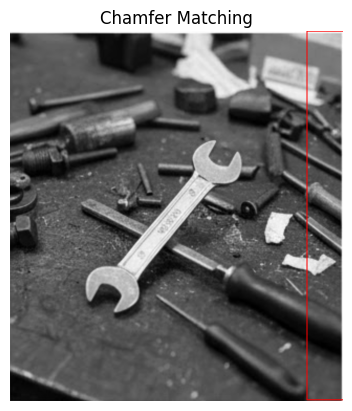

In [16]:
# 4️⃣ CHAMFER MATCHING (object shape comparison)
template = cv2.imread("dataset/object_template.png", cv2.IMREAD_GRAYSCALE)
target = cv2.imread("dataset/object_scene.png", cv2.IMREAD_GRAYSCALE)
if template is not None and target is not None:
    edges_templ = cv2.Canny(template, 50, 150)
    edges_targ = cv2.Canny(target, 50, 150)
    dist = cv2.distanceTransform(255 - edges_targ, cv2.DIST_L2, 5)
    match = cv2.filter2D(dist, -1, edges_templ.astype(np.float32))
    min_loc = cv2.minMaxLoc(match)[2]
    target_color = cv2.cvtColor(target, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(target_color, min_loc, (min_loc[0]+template.shape[1], min_loc[1]+template.shape[0]), (0,0,255), 2)
    plt.imshow(cv2.cvtColor(target_color, cv2.COLOR_BGR2RGB))
    plt.title("Chamfer Matching")
    plt.axis('off')
    plt.show()

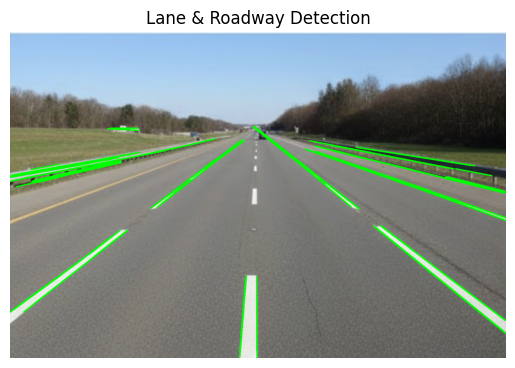

In [18]:
# 5️⃣ IN-VEHICLE VISION SYSTEM – LANE DETECTION
road = cv2.imread("dataset/road.png")
if road is not None:
    gray = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blur, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=100, maxLineGap=50)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(road, (x1, y1), (x2, y2), (0,255,0), 3)
    plt.imshow(cv2.cvtColor(road, cv2.COLOR_BGR2RGB))
    plt.title("Lane & Roadway Detection")
    plt.axis('off')
    plt.show()

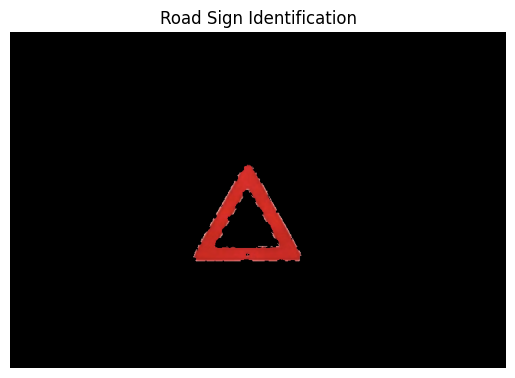

In [19]:
# 6️⃣ ROAD SIGN IDENTIFICATION (color segmentation)
sign = cv2.imread("dataset/road_sign.png")
if sign is not None:
    hsv = cv2.cvtColor(sign, cv2.COLOR_BGR2HSV)
    red_mask = cv2.inRange(hsv, (0,70,50), (10,255,255))
    output = cv2.bitwise_and(sign, sign, mask=red_mask)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Road Sign Identification")
    plt.axis('off')
    plt.show()

## 🧾 Explanation of Outputs
| Concept                              | Technique                        | Output                                 |
| :----------------------------------- | :------------------------------- | :------------------------------------- |
| **Face Detection**                   | Haar Cascade Classifier          | Green rectangles around detected faces |
| **Eigenfaces**                       | PCA for dimensionality reduction | Visualized eigenface pattern           |
| **Foreground–Background Separation** | Image differencing               | Binary mask of moving region           |
| **Chamfer Matching**                 | Edge-based shape matching        | Red rectangle on matched shape         |
| **Lane Detection**                   | Edge + Hough Transform           | Green lines highlighting lanes         |
| **Road Sign Identification**         | HSV color thresholding           | Highlighted red-colored road sign      |

## 📚 Summary
This single script demonstrates:

- Photo album automation via face detection & recognition.

- Surveillance tasks using motion masks and Chamfer matching.

- Driver-assistance vision for lane and road-sign detection.